In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
# import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [7]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

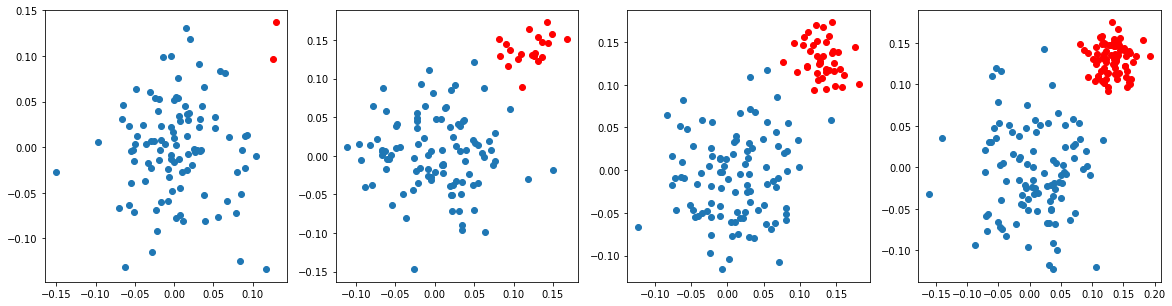

In [8]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

Implementing SVC

Number of support vectors [2 2]
Number of support vectors [2 3]
Number of support vectors [2 3]


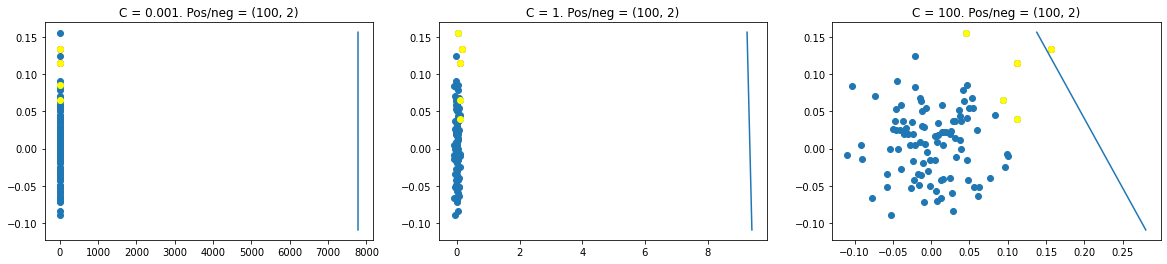

Number of support vectors [20 20]
Number of support vectors [20 22]
Number of support vectors [4 4]


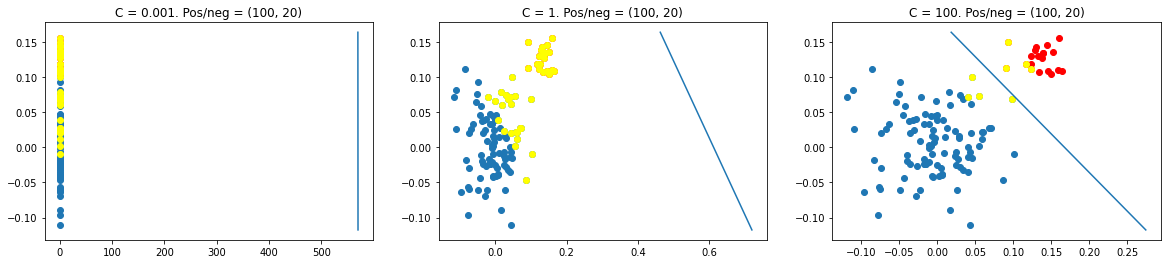

Number of support vectors [40 40]
Number of support vectors [40 40]
Number of support vectors [6 6]


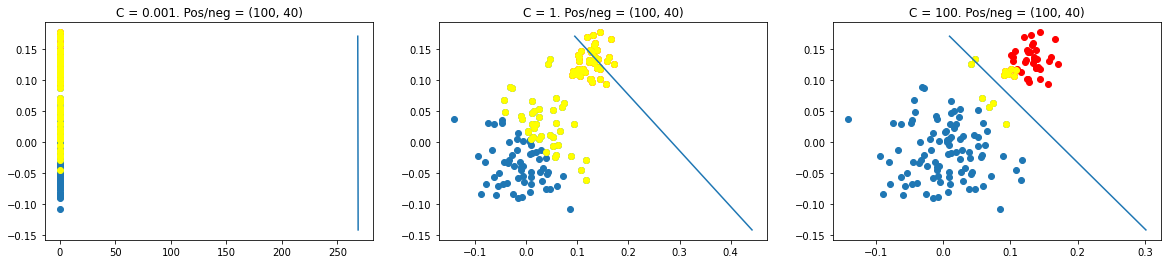

Number of support vectors [80 80]
Number of support vectors [64 64]
Number of support vectors [5 6]


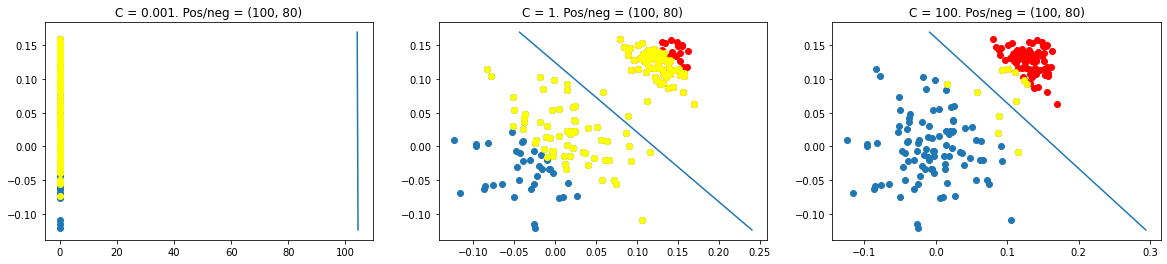

In [24]:
#you can start writing code here.
from sklearn.svm import SVC as svc
C = [0.001, 1, 100]
for j,i in enumerate(ratios): 
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.figure(figsize=(20,4))
    for k in range(len(C)):
        plt.subplot(1, 3, k+1)
        clf = svc(C = C[k], kernel = 'linear')
        clf.fit(X, y)
        coef = clf.coef_
        intercept = clf.intercept_
        support_vectors = clf.support_vectors_
        print('Number of support vectors', clf.n_support_)
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.scatter(support_vectors[:,0], support_vectors[:,1], color='yellow')
        plt.title('C = {}. Pos/neg = {}'.format(C[k], ratios[j]))
        draw_line(coef[0], intercept, min(X[:,0]), max(X[:,0]))
    plt.show()  

Observation:

In [ ]:
# C = 0.001
The hyperplane is very far away from the data points.
with this C value, no matter the degree of data imbalance, the hyperplane is practically useless.

# C = 1
when data set is highly imbalanced, the hyperplane is very far away from the data points.
But when the data gets more balanced, the performance improves as suggested by Fig (4,2). 
This works well only with more balanced data.

# C = 100
This model also doesn't perform well in case of highly imbalanced data.
But the model performance improves with improvement in data balance , as suggested by fig (2,3), (3,3) and (4,3).

in all the cases, as data imbalance improves, the number of support vectors (yellow points) increases, but no of support vectors 
is less when C is 100.

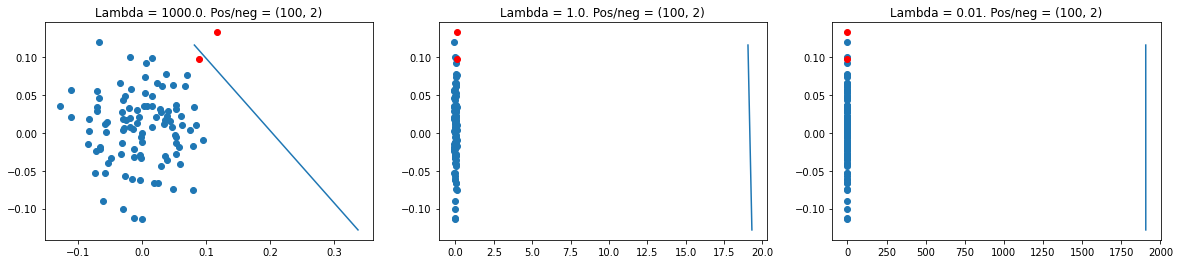

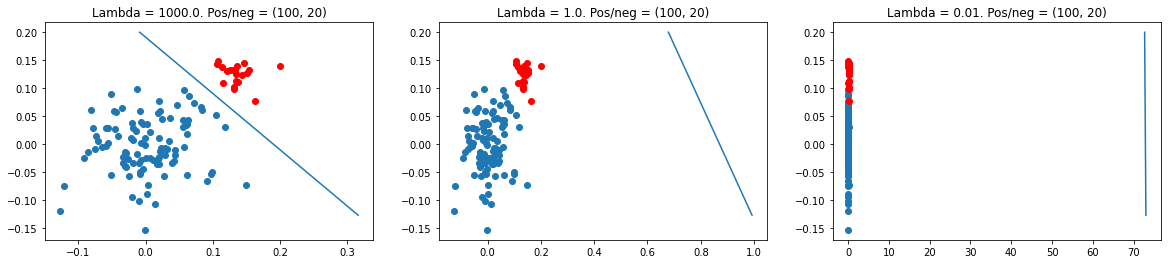

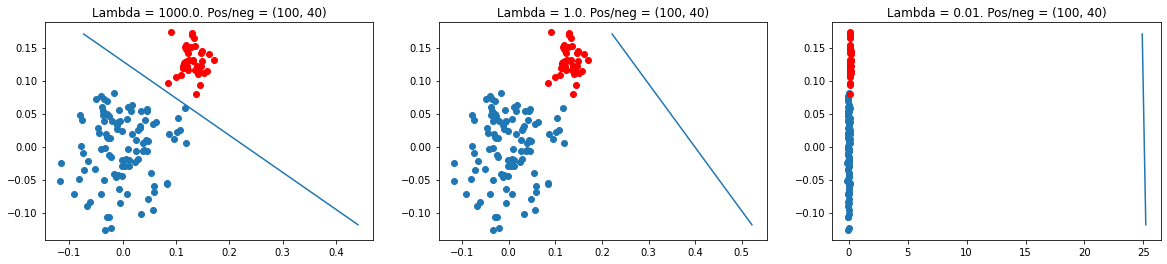

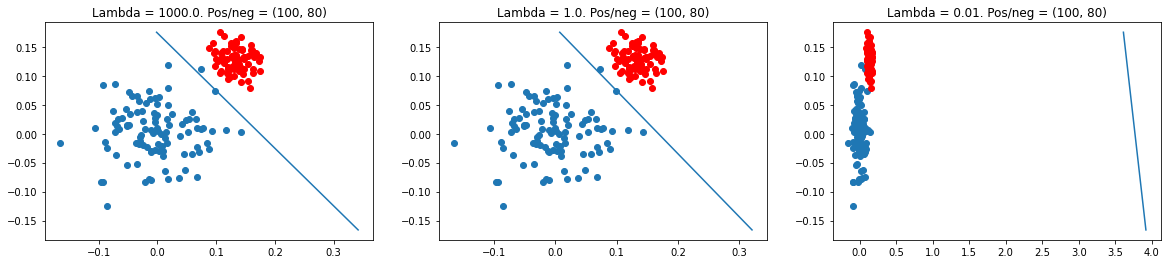

In [19]:
from sklearn.linear_model import LogisticRegression
C = [0.001, 1, 100]
C = list(map(lambda x: 1/x, C))
for j,i in enumerate(ratios): 
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.figure(figsize=(20,4))
    for k in range(len(C)):
        plt.subplot(1, 3, k+1)
        clf = LogisticRegression(C = C[k])
        clf.fit(X, y)
        coef = clf.coef_
        intercept = clf.intercept_
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.title('Lambda = {}. Pos/neg = {}'.format(C[k], ratios[j]))
        draw_line(coef[0], intercept, min(X[:,0]), max(X[:,0]))
    plt.show()

Observation:

In [21]:
# Lambda = 0.01
The hyperplane is very far away from the data points.
with this Lambda value, no matter the degree of data imbalance, the hyperplane is practically useless.

# Lambda = 1
when data set is highly imbalanced, the hyperplane is very far away from the data points.
But when the data gets more balanced, the performance improves as suggested by Fig (4,2). 
This works well only with more balanced data.

# Lambda = 100
This model also doesn't perform well in case of highly imbalanced data.
But the model performance improves with improvement in data balance , as suggested by fig (2,1), (3,1) and (4,1).
However, it misclassifies one positive point when pos/neg data ratio is 100:80.

SyntaxError: invalid syntax (<ipython-input-21-724f384cb740>, line 2)